In [88]:
from sklearn.datasets import load_breast_cancer

### 1. 데이터 Load 및 데이터 확인

In [89]:
cancer = load_breast_cancer()

In [90]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [91]:
print(cancer.data.shape)
cancer.data[:2]

(569, 30)


array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
          3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
          1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
          1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02,
          1.32600000e+03,   8.47400000e-02,   7.86400000e-02,
          8.69000000e-02,   7.01700000e-02,   1.81200000e-01,
          5.66700000e-02,   5.43500000e-01,   7.33900000e-01,
          3.39800000e+00,   7.40800000e+01,   5.22500000e-03,
          1.30800000e-02,   1.86000000e-02,   1.34000000e-02,
       

In [92]:
print(cancer.target.shape)
cancer.target[:3]

(569,)


array([0, 0, 0])

In [93]:
print(cancer.target_names.shape)
#benign 양성의, malignant 악성의
cancer.target_names

(2,)


array(['malignant', 'benign'],
      dtype='<U9')

In [94]:
print(cancer.feature_names.shape)
cancer.feature_names

(30,)


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [95]:
import numpy as np

In [96]:

# 클래스별 샘플 개수
print('클래스별 샘플 개수 \n{}'.format(
    {n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}
))

클래스별 샘플 개수 
{'malignant': 212, 'benign': 357}


### 2. train data 와 test data로 나누기

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=42)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
clf = KNeighborsClassifier(n_neighbors=11)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [101]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [102]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1])

In [103]:
print('테스트 세트의 정확도 \n{:.2f}'.format(np.mean(y_pred==y_test)))

테스트 세트의 정확도 
0.98


In [104]:
print('테스트 세트의 정확도 점수 \n{:.2f}'.format(clf.score(X_test,y_test)))

테스트 세트의 정확도 점수 
0.98


In [105]:
train_accuracy = []
test_accuracy = []

In [106]:
neighbors_settings = range(1,11)

In [107]:
for neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=neighbors)
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

In [108]:
print(train_accuracy)
test_accuracy

[1.0, 0.96713615023474175, 0.95070422535211263, 0.9460093896713615, 0.93427230046948362, 0.92957746478873238, 0.93661971830985913, 0.93896713615023475, 0.93427230046948362, 0.92957746478873238]


[0.93006993006993011,
 0.92307692307692313,
 0.93006993006993011,
 0.94405594405594406,
 0.965034965034965,
 0.95104895104895104,
 0.95804195804195802,
 0.95804195804195802,
 0.95804195804195802,
 0.97202797202797198]

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

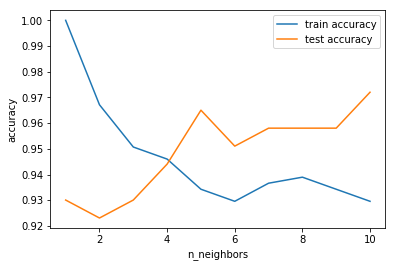

In [110]:
plt.plot(neighbors_settings,train_accuracy,label='train accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel("n_neighbors")
plt.legend()

In [111]:

# 최근접 이웃의 수가 하나일 때는 훈련데이터에 대한 예측이 완벽합니다. 
# 하지만 이웃의 수가 늘어나면 모델은 단순해지고 훈련데이터의 정확도는 줄어듭니다. 
# 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮습니다. 
# 이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명해줍니다.  
# 정확도가 가장 좋을 때는 중간 정도의 5개의 사용한 경우입니다. 
